In [1]:
test_type='test'
test_endpoint='http://localhost:8080/30'
simulation_identifier='s2'

In [2]:
! ../k6_scripts/run_load.sh $test_type $test_endpoint $simulation_identifier

Running stress testing

          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: /home/jovyan/k6_scripts/test.js
     output: InfluxDBv1 (http://localhost:8086)

  scenarios: (100.00%) 1 scenario, 1 max VUs, 32s max duration (incl. graceful stop):
           * spike: Up to 1 looping VUs for 2s over 1 stages (gracefulRampDown: 0s, gracefulStop: 30s)


running (00.1s), 0/1 VUs, 0 complete and 0 interrupted iterations
spike   [>-------------------------------------] 0/1 VUs  0.1s/2.0s

running (00.2s), 0/1 VUs, 0 complete and 0 interrupted iterations
spike   [==>-----------------------------------] 0/1 VUs  0.2s/2.0s

running (00.3s), 0/1 VUs, 0 complete and 0 interrupted iterations
spike   [====>---------------------------------] 0/1 VUs  0.3s/2.0s

running (00.4s), 0/1 VUs, 0 complete and 0 interrupted iterations
spike   

In [ ]:
from influxdb import DataFrameClient
import seaborn
import matplotlib.pyplot as plt

In [8]:
client = DataFrameClient('localhost', 8086)
client.switch_database('k6')

res = client.query('SELECT * FROM "processing_time"')
# A dict of metrics is returns
res = res['processing_time']
res

NameError: name 'DataFrameClient' is not defined

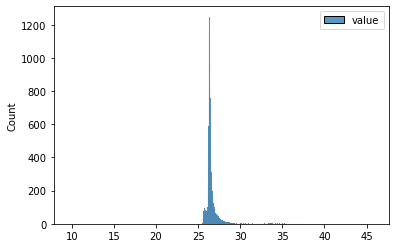

In [16]:
seaborn.histplot(res)
plt.show()